# Использование индексов биологического разнообразия для анализа микробиоты

Задание:

- Описать подходы к подсчету разнообразия микробиоты разными критериями
- Подсчитать каждый подход для наших данных

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:
DOCS_DOMAIN_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'domain.xlsx')
DOCS_PHYLUM_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'phylum.xlsx')
DOCS_CLASS_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'class.xlsx')
DOCS_ORDER_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'order.xlsx')
DOCS_FAMILY_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'family.xlsx')
DOCS_SPECIES_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'species.xlsx')

DOCS_FULL_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'full.xlsx')

In [5]:
df_domain = pd.read_excel(DOCS_DOMAIN_PATH)
df_phylum = pd.read_excel(DOCS_PHYLUM_PATH)
df_class = pd.read_excel(DOCS_CLASS_PATH)
df_order = pd.read_excel(DOCS_ORDER_PATH)
df_family = pd.read_excel(DOCS_FAMILY_PATH)
df_species = pd.read_excel(DOCS_SPECIES_PATH)

df_docs = pd.read_excel(DOCS_FULL_PATH)

Загружаем данные для анализа

In [6]:
DATA_CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data.xlsx')
DATA_CLEAN_UNWRAP_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_unwrap.xlsx')

In [7]:
df_clean = pd.read_excel(DATA_CLEAN_PATH)
df_clean_unwrap = pd.read_excel(DATA_CLEAN_UNWRAP_PATH)

In [8]:
df_clean.head()

,group,number,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,1,0,0,0,5,0,0,77,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,2,0,0,5,10,0,0,95,3,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,1,0,0,3,0,0,0,22,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,2,10,0,0,0,0,0,23,0,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,1,0,4,3,0,0,0,19,0,...,8,0,323,8,6,0,0,0,0,0


In [9]:
df_clean_unwrap_docs = df_clean_unwrap.merge(df_docs, on=['id_species'], how='left')
df_clean_unwrap_docs.head()

,group,number,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,1,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,1,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,1,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,1,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


Нормализованное представление по филумам

In [10]:
df_clean_by_phylum= pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['phylum'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_phylum = df_clean_by_phylum.T
df_clean_by_phylum_normalize = df_clean_by_phylum.copy()
df_clean_by_phylum_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_phylum)
df_clean_by_phylum_normalize.head(5)

phylum        Actinobacteria  Ascomycota  Bacteroidetes  Firmicutes  \
group number                                                          
Fe    1             0.000715         0.0       0.619878    0.374672   
      2             0.000973         0.0       0.445806    0.533467   
АУ    1             0.000605         0.0       0.542650    0.455303   
      2             0.000954         0.0       0.679295    0.312494   
Биф   1             0.001645         0.0       0.430967    0.533662   

phylum        Proteobacteria  unclassified_Bacteria  
group number                                         
Fe    1             0.004564               0.000170  
      2             0.019468               0.000286  
АУ    1             0.001443               0.000000  
      2             0.007257               0.000000  
Биф   1             0.033726               0.000000

Нормализованное представление по классам

In [11]:
df_clean_by_class = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['class'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_class = df_clean_by_class.T
df_clean_by_class_normalize = df_clean_by_class.copy()
df_clean_by_class_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_class)
df_clean_by_class_normalize.head(5)

class         Actinobacteria  Alphaproteobacteria   Bacilli  Bacteroidia  \
group number                                                               
Fe    1             0.000000             0.000102  0.178071     0.619878   
      2             0.000286             0.000000  0.134555     0.445806   
АУ    1             0.000233             0.000000  0.061148     0.542650   
      2             0.000341             0.000273  0.068584     0.679295   
Биф   1             0.000316             0.000190  0.358707     0.430967   

class         Betaproteobacteria  Clostridia  Coriobacteriia  \
group number                                                   
Fe    1                 0.000272    0.179809        0.000715   
      2                 0.000229    0.391640        0.000687   
АУ    1                 0.000000    0.393271        0.000372   
      2                 0.001192    0.234132        0.000613   
Биф   1                 0.000000    0.168438        0.001329   

class         Deltaproteobacteria  Dothideomycetes  Erysipelotrichia  \
group number                                                           
Fe    1                  0.002316              0.0          0.013761   
      2                  0.000172              0.0          0.006127   
АУ    1                  0.000279              0.0          0.000372   
      2                  0.000715              0.0          0.008654   
Биф   1                  0.001708              0.0          0.005189   

class         Gammaproteobacteria  unclassified_Bacteria  \
group number                                               
Fe    1                  0.001873               0.000170   
      2                  0.019067               0.000286   
АУ    1                  0.001163               0.000000   
      2                  0.005076               0.000000   
Биф   1                  0.031827               0.000000   

class         unclassified_Firmicutes  
group number                           
Fe    1                      0.003031  
      2                      0.001145  
АУ    1                      0.000512  
      2                      0.001124  
Биф   1                      0.001329

Нормализованное представление по порядкам

In [12]:
df_clean_by_order = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['order'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_order = df_clean_by_order.T
df_clean_by_order_normalize = df_clean_by_order.copy()
df_clean_by_order_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_order)
df_clean_by_order_normalize.head(5)

order         Bacillales  Bacteroidales  Bdellovibrionales  Burkholderiales  \
group number                                                                  
Fe    1         0.000204       0.619878           0.002316         0.000272   
      2         0.009734       0.445806           0.000172         0.000229   
АУ    1         0.000279       0.542650           0.000279         0.000000   
      2         0.000000       0.679295           0.000715         0.001192   
Биф   1         0.005378       0.430967           0.001708         0.000000   

order         Clostridiales  Eggerthellales  Enterobacteriales  \
group number                                                     
Fe    1            0.179809        0.000715           0.001703   
      2            0.391640        0.000687           0.019067   
АУ    1            0.393271        0.000372           0.001163   
      2            0.234132        0.000613           0.005076   
Биф   1            0.168438        0.001329           0.031005   

order         Erysipelotrichales  Kiloniellales  Lactobacillales  \
group number                                                       
Fe    1                 0.013761       0.000102         0.177867   
      2                 0.006127       0.000000         0.124821   
АУ    1                 0.000372       0.000000         0.060868   
      2                 0.008654       0.000273         0.068584   
Биф   1                 0.005189       0.000000         0.353328   

order         Micrococcales  Mycobacteriales  Pseudomonadales  Rhizobiales  \
group number                                                                 
Fe    1            0.000000         0.000000              0.0      0.00000   
      2            0.000000         0.000286              0.0      0.00000   
АУ    1            0.000000         0.000233              0.0      0.00000   
      2            0.000341         0.000000              0.0      0.00000   
Биф   1            0.000000         0.000316              0.0      0.00019   

order         Xanthomonadales  unclassified_Bacteria  \
group number                                           
Fe    1              0.000170               0.000170   
      2              0.000000               0.000286   
АУ    1              0.000000               0.000000   
      2              0.000000               0.000000   
Биф   1              0.000823               0.000000   

order         unclassified_Dothideomycetes  unclassified_Firmicutes  
group number                                                         
Fe    1                                0.0                 0.003031  
      2                                0.0                 0.001145  
АУ    1                                0.0                 0.000512  
      2                                0.0                 0.001124  
Биф   1                                0.0                 0.001329

Нормализованное представление по семействам

In [13]:
df_clean_by_family = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['family'], columns=['group', 'number'], aggfunc='sum')
df_clean_by_family = df_clean_by_family.T
df_clean_by_family_normalize = df_clean_by_family.copy()
df_clean_by_family_normalize.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_clean_by_family)
df_clean_by_family_normalize.head(5)

family        Bacillaceae 1  Bacteroidaceae  Barnesiellaceae  \
group number                                                   
Fe    1            0.000204        0.456249         0.027692   
      2            0.009390        0.414257         0.000744   
АУ    1            0.000279        0.370096         0.000791   
      2            0.000000        0.639126         0.001158   
Биф   1            0.004556        0.153632         0.002847   

family        Bdellovibrionaceae  Brucellaceae  Carnobacteriaceae  \
group number                                                        
Fe    1                 0.002316       0.00000           0.000000   
      2                 0.000172       0.00000           0.000573   
АУ    1                 0.000279       0.00000           0.000000   
      2                 0.000715       0.00000           0.000000   
Биф   1                 0.001708       0.00019           0.000506   

family        Catabacteriaceae  Christensenellaceae  Clostridiaceae 1  \
group number                                                            
Fe    1               0.000238             0.000102                 0   
      2               0.064357             0.000000                 0   
АУ    1               0.000326             0.000000                 0   
      2               0.007632             0.000000                 0   
Биф   1               0.006581             0.000000                 0   

family        Clostridiales_Incertae Sedis XIII  ...  Streptococcaceae  \
group number                                     ...                     
Fe    1                                0.000681  ...          0.000272   
      2                                0.001202  ...          0.001889   
АУ    1                                0.001117  ...          0.000000   
      2                                0.001192  ...          0.000000   
Биф   1                                0.000000  ...          0.006011   

family        Sutterellaceae  Xanthomonadaceae  unclassified_"Bacteroidales"  \
group number                                                                   
Fe    1             0.000272          0.000170                           0.0   
      2             0.000229          0.000000                           0.0   
АУ    1             0.000000          0.000000                           0.0   
      2             0.001192          0.000000                           0.0   
Биф   1             0.000000          0.000823                           0.0   

family        unclassified_Bacillales  unclassified_Bacteria  \
group number                                                   
Fe    1                      0.000000               0.000170   
      2                      0.000344               0.000286   
АУ    1                      0.000000               0.000000   
      2                      0.000000               0.000000   
Биф   1                      0.000823               0.000000   

family        unclassified_Clostridiales  unclassified_Dothideomycetes  \
group number                                                             
Fe    1                         0.005756                           0.0   
      2                         0.012310                           0.0   
АУ    1                         0.002559                           0.0   
      2                         0.018568                           0.0   
Биф   1                         0.005062                           0.0   

family        unclassified_Firmicutes  unclassified_Lactobacillales  
group number                                                         
Fe    1                      0.003031                      0.000000  
      2                      0.001145                      0.000000  
АУ    1                      0.000512                      0.000000  
      2                      0.001124                      0.000000  
Биф   1                      0.001329                      0.000253  

[5 rows x 37 col

Нормализация по всем таксонам

In [14]:
df_clean_temp = df_clean.set_index(['group', 'number']).sort_index()
df_clean_temp.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_temp)
df_clean_normalize = df_clean_temp
df_clean_normalize.head()

Arthrobacter  Galactobacter  Corynebacterium  Adlercreutzia  \
group number                                                                
Fe    1           0.000000            0.0         0.000000       0.000000   
      2           0.000000            0.0         0.000286       0.000000   
АУ    1           0.000000            0.0         0.000233       0.000000   
      2           0.000341            0.0         0.000000       0.000000   
Биф   1           0.000000            0.0         0.000316       0.000443   

              Gordonibacter  Paraeggerthella  Rubneribacter  Slackia  \
group number                                                           
Fe    1            0.000000                0       0.000715      0.0   
      2            0.000229                0       0.000458      0.0   
АУ    1            0.000000                0       0.000372      0.0   
      2            0.000000                0       0.000613      0.0   
Биф   1            0.000380                0       0.000506      0.0   

              unclassified_Eggerthellaceae  Bacteroides  ...  Turicimonas  \
group number                                             ...                
Fe    1                                0.0     0.449504  ...     0.000272   
      2                                0.0     0.408646  ...     0.000229   
АУ    1                                0.0     0.339243  ...     0.000000   
      2                                0.0     0.633334  ...     0.001192   
Биф   1                                0.0     0.145533  ...     0.000000   

              Vampirovibrio  Enterobacter  Escherichia/Shigella  Klebsiella  \
group number                                                                  
Fe    1            0.002316      0.001703                   0.0    0.000000   
      2            0.000172      0.018551                   0.0    0.000515   
АУ    1            0.000279      0.001163                   0.0    0.000000   
      2            0.000715      0.005076                   0.0    0.000000   
Биф   1            0.001708      0.030246                   0.0    0.000759   

              unclassified_Enterobacteriaceae  Acinetobacter  \
group number                                                   
Fe    1                                   0.0            0.0   
      2                                   0.0            0.0   
АУ    1                                   0.0            0.0   
      2                                   0.0            0.0   
Биф   1                                   0.0            0.0   

              Stenotrophomonas  unclassified_Bacteria  \
group number                                            
Fe    1               0.000170               0.000170   
      2               0.000000               0.000286   
АУ    1               0.000000               0.000000   
      2               0.000000               0.000000   
Биф   1               0.000823               0.000000   

              unclassified_Dothideomycetes  
group number                                
Fe    1                                0.0  
      2                                0.0  
АУ    1                                0.0  
      2                                0.0  
Биф   1                                0.0  

[5 rows x 108 columns]

In [15]:
df_clean.drop(columns=['number']).groupby(by=['group']).agg(np.mean)

,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,unclassified_Eggerthellaceae,Bacteroides,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
group,,,,,,,,,,,,,,,,,,,,,
Fe,0.0,0.0,2.5,0.0,2.0,0.0,14.5,0.0,0.0,10167.0,...,6.0,35.5,187.0,0.0,4.5,0.0,0.0,2.5,5.0,0.0
АУ,5.0,0.0,2.5,0.0,0.0,0.0,13.0,0.0,0.0,12939.5,...,17.5,13.5,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Биф,7.5,0.0,2.5,5.0,3.0,0.0,35.0,0.0,1.5,6193.0,...,101.5,95.0,445.5,2.5,10.0,0.0,0.0,8.5,3.5,0.0
Лакт,0.0,0.0,0.0,5.5,2.0,0.0,122.0,2.5,0.0,10215.5,...,4.0,15.5,192.5,2.5,7.5,0.0,0.0,0.0,6.0,0.0
Медь,0.0,4.0,7.5,0.0,0.0,0.0,45.0,0.0,0.0,14462.0,...,3.5,44.0,815.5,0.0,8.0,0.0,6.0,52.5,4.0,0.0
ПДР,5.0,0.0,1.5,0.0,0.0,0.0,22.5,0.0,1.5,9889.0,...,4.5,10.5,186.0,8.5,2.5,0.0,0.0,15.0,1.5,0.0
ПР,0.0,0.0,2.5,7.5,0.0,0.0,86.0,1.5,0.0,5832.5,...,1.5,15.5,293.5,0.0,2.5,0.0,1.5,3.0,3.5,0.0
Спор,0.0,1.5,3.5,5.5,0.0,0.0,21.0,0.0,1.5,11029.5,...,12.5,17.5,2337.0,5.0,23.0,1.5,0.0,15.5,2.5,0.0
Хит,0.0,0.0,0.0,8.0,12.5,0.0,146.0,3.0,0.0,6700.5,...,1.5,114.0,224.5,1.5,3.5,0.0,0.0,10.5,0.0,0.0


In [16]:
DF_BY_GROUPS = [
    {'title': 'По всем таксонам', 'df': df_clean_normalize},
    {'title': 'По семействам', 'df': df_clean_by_family_normalize},
    {'title': 'По порядкам', 'df': df_clean_by_order_normalize},
    {'title': 'По классам', 'df': df_clean_by_class_normalize},
    {'title': 'По филумам', 'df': df_clean_by_phylum_normalize},
]

In [17]:
df_clean_avg = df_clean.drop(columns=['number']).groupby(by=['group']).agg(np.mean)

In [18]:
df_clean_avg_normalize = df_clean_avg.copy()
df_clean_avg_normalize.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_avg)

In [19]:
df_clean_avg_by_family_normalize = df_clean_by_family.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)
df_clean_avg_by_family_normalize.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_avg_by_family_normalize)

In [20]:
df_clean_avg_by_order_normalize = df_clean_by_order.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)
df_clean_avg_by_order_normalize.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_avg_by_order_normalize)

In [21]:
df_clean_avg_by_class_normalize = df_clean_by_class.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)
df_clean_avg_by_class_normalize.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_avg_by_class_normalize)

In [22]:
df_clean_avg_by_phylum_normalize = df_clean_by_phylum.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)
df_clean_avg_by_phylum_normalize.iloc[:, :] = Normalizer(norm='l1').fit_transform(df_clean_avg_by_phylum_normalize)

In [28]:
DF_AVG_BY_GROUPS = [
    {'title': 'По всем таксонам', 'df': df_clean_avg_normalize},
    {'title': 'По семействам', 'df': df_clean_avg_by_family_normalize},
    {'title': 'По порядкам', 'df': df_clean_avg_by_order_normalize},
    {'title': 'По классам', 'df': df_clean_avg_by_class_normalize},
    {'title': 'По филумам', 'df': df_clean_avg_by_phylum_normalize},
]

In [29]:
df_clean_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)

,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,unclassified_Eggerthellaceae,Bacteroides,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
group,,,,,,,,,,,,,,,,,,,,,
Fe,0.000000,0.000000,0.000143,0.000000,0.000115,0.0,0.000587,0.000000,0.000000,0.429075,...,0.000251,0.001244,0.010127,0.000000,0.000258,0.000000,0.000000,0.000085,0.000228,0.00000
АУ,0.000170,0.000000,0.000116,0.000000,0.000000,0.0,0.000493,0.000000,0.000000,0.486289,...,0.000596,0.000497,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Биф,0.000246,0.000000,0.000158,0.000271,0.000190,0.0,0.001272,0.000000,0.000049,0.238453,...,0.003335,0.003532,0.021907,0.000082,0.000511,0.000000,0.000000,0.000477,0.000115,0.00000
Лакт,0.000000,0.000000,0.000000,0.000202,0.000073,0.0,0.004435,0.000090,0.000000,0.371554,...,0.000144,0.000556,0.007044,0.000092,0.000274,0.000000,0.000000,0.000000,0.000215,0.00000
Медь,0.000000,0.000146,0.000272,0.000000,0.000000,0.0,0.001633,0.000000,0.000000,0.524968,...,0.000127,0.001598,0.029655,0.000000,0.000291,0.000000,0.000218,0.001910,0.000145,0.00000
ПДР,0.000256,0.000000,0.000066,0.000000,0.000000,0.0,0.001074,0.000000,0.000077,0.448313,...,0.000230,0.000537,0.009321,0.000414,0.000128,0.000000,0.000000,0.000754,0.000077,0.00000
ПР,0.000000,0.000000,0.000074,0.000289,0.000000,0.0,0.003572,0.000045,0.000000,0.211993,...,0.000084,0.000764,0.015142,0.000000,0.000140,0.000000,0.000084,0.000129,0.000144,0.00000
Спор,0.000000,0.000063,0.000134,0.000211,0.000000,0.0,0.000808,0.000000,0.000053,0.415511,...,0.000440,0.000661,0.095887,0.000210,0.000934,0.000063,0.000000,0.000628,0.000088,0.00000
Хит,0.000000,0.000000,0.000000,0.000331,0.000545,0.0,0.006508,0.000130,0.000000,0.294096,...,0.000068,0.004832,0.010169,0.000068,0.000160,0.000000,0.000000,0.000479,0.000000,0.00000


In [30]:
DF_AVG_FRAC_BY_GROUPS = [
    {'title': 'По всем таксонам', 'df': df_clean_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)},
    {'title': 'По семействам', 'df': df_clean_by_family_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)},
    {'title': 'По порядкам', 'df': df_clean_by_order_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)},
    {'title': 'По классам', 'df': df_clean_by_class_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)},
    {'title': 'По филумам', 'df': df_clean_by_phylum_normalize.reset_index().drop(columns=['number']).groupby(by=['group']).agg(np.mean)},
]

In [31]:
GROUP_CLEAN = 'ПР'

In [32]:
MIN_ZERO_LOG = -1e-10
MIN_ZERO_LOG

-1e-10

## 1 Альфа разнообразие

$\alpha$ разнообразие описывает разнообразие внутри сообщества. Существует несколько различных индексов, используемых для расчета $\alpha$ разнообразия, поскольку разные индексы отражают разные аспекты разнообразия и имеют разную чувствительность к разным факторам. Эти индексы были разработаны для решения конкретных исследовательских вопросов, учета различных экологических или популяционных характеристик или выделения определенных аспектов разнообразия.

<img src="../img/alphadiversity_metrics.png" width=600>

### 1.1 Индекс разнообразия Шеннона

**Индекс разнообразия Шеннона** (Shannon, 1948) и рассчитывается по формуле:

$$ H = - \sum_{i=1}^{S} p_i\log_{2}p_i $$

где $p_i$ – встречаемость вида $i$ относительного общего содержания всех особей всех видов, $S$ – количество изучаемых видов.

Индекс Шеннона принимает значения от $0$ до $\ln(S)$, где $\ln$ — натуральный логарифм. Значение 0 соответствует популяции с одним видом, а значение $\ln(S)$ соответствует популяции с равным количеством особей каждого вида.

Индекс Шеннона широко используется в экологии для оценки разнообразия видов в сообществе. Например, он может быть использован для сравнения разнообразия видов в разных биоценозах или для оценки влияния антропогенного воздействия на биоразнообразие.

In [49]:
def shennon_diversity(fracs: np.array):
    logs = np.array([np.log(fr) if fr > 0.0005 else 0 for fr in fracs])
    return -sum(logs * fracs)

<span style="color: red">Для 0 считаем 0</span>

По всем таксонам


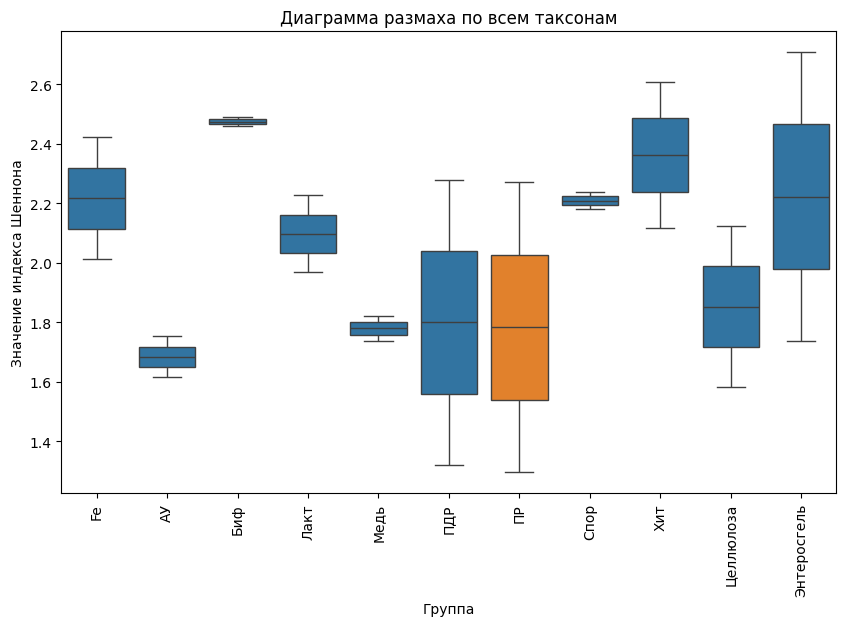

По семействам


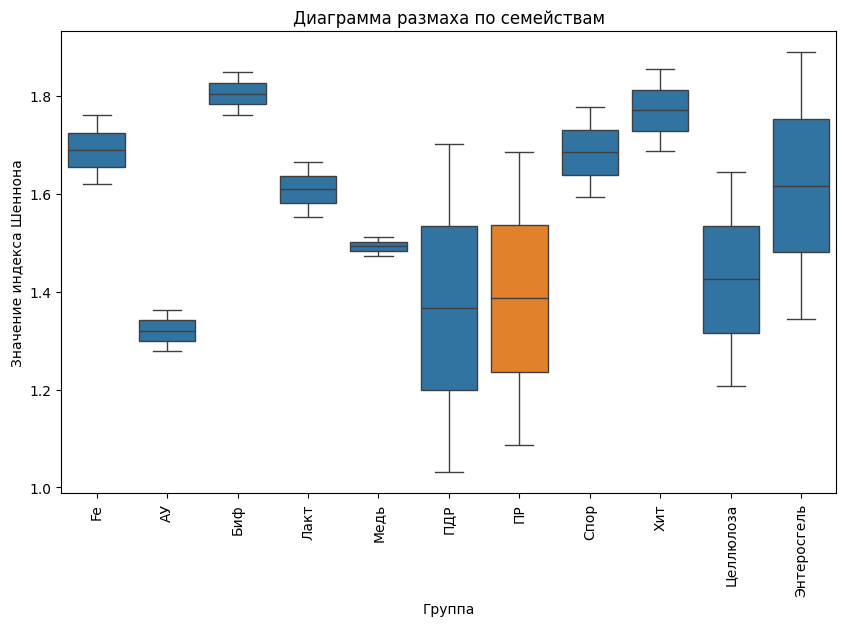

По порядкам


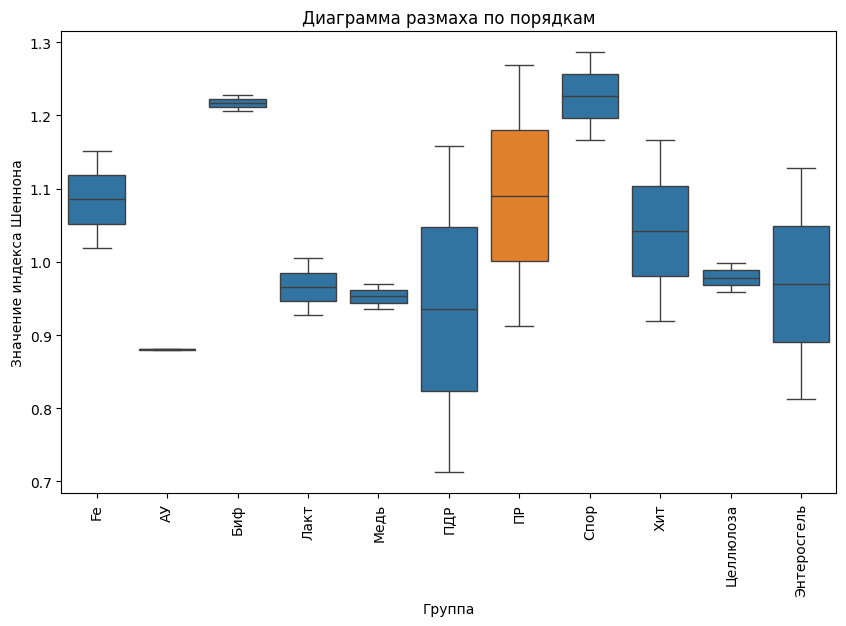

По классам


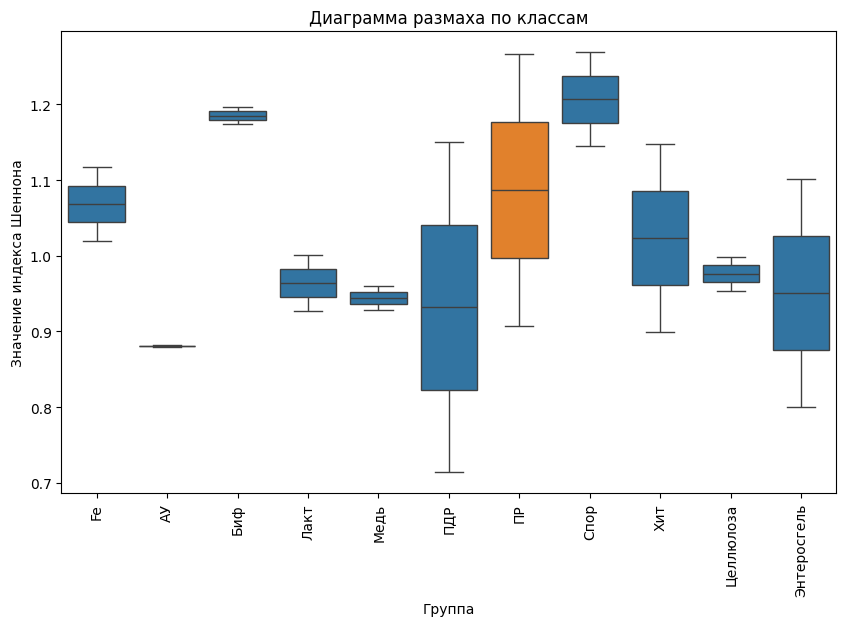

По филумам


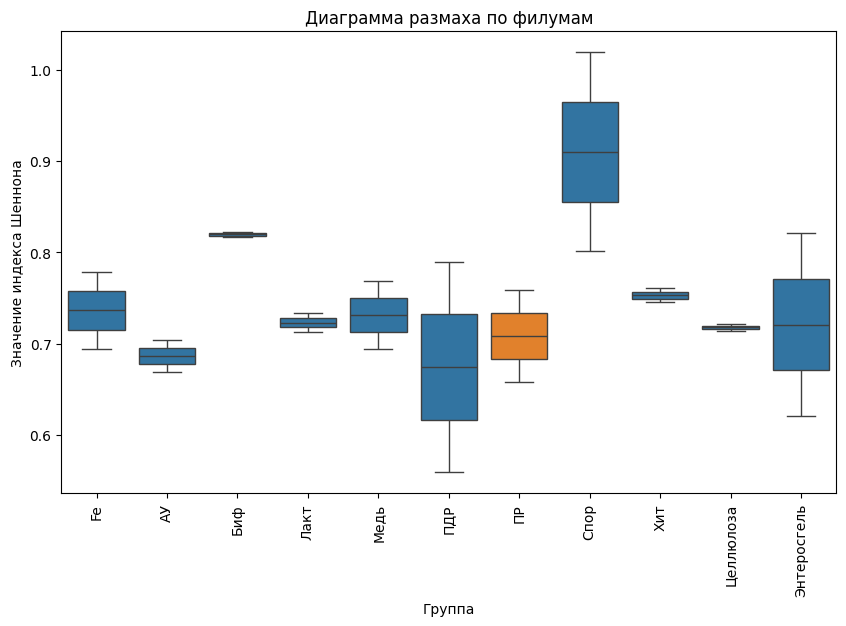

In [52]:
def shennon_diversity_test():
    for test_iter in DF_BY_GROUPS:
        print(test_iter['title'])
        df_iter = test_iter['df'].copy()
        df_iter['shennon_diversity'] = df_iter.apply(shennon_diversity, axis=1)
        group_counts = df_iter.reset_index()[['group', 'shennon_diversity']]
        group_counts = group_counts.sort_values(by=['group'])

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_xlabel('Группа')
        ax.set_ylabel('Значение индекса Шеннона')
        colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
        ax.tick_params(axis='x', labelrotation=90)
        sns.boxplot(data=group_counts, x='group', y='shennon_diversity', ax=ax, palette=colors)
        plt.title(f"Диаграмма размаха {test_iter['title'].lower()}")
        plt.show()
shennon_diversity_test()

### 1.2 Индекс Симпсона

**Индекс разнообразия Симпсона** имеет вид:

$$ C = \sum_{i=1}^{S} p_i^2 $$

где $p_i$ – встречаемость вида $i$ относительного общего содержания всех особей всех видов, $S$ – количество изучаемых видов.

Поскольку при возведении в квадрат малых отношений $p_i^2$ получаются очень малые величины, индекс Симпсона тем больше, чем сильнее доминирование одного или нескольких видов. Индекс Симпсона служит мерой связи числа степеней свободы внутривидовых и межвидовых взаимодействий. Его значение варьируется от 0 до 1, что значит бесконечное разнообразие или его отсутствие соответственно.

In [20]:
def simpson_diversity(fracs: list):
    return sum(fracs**2)

In [21]:
df_test = df_clean_by_phylum_normalize.copy()
df_test['simpson_diversity'] = df_test.apply(simpson_diversity, axis=1)
df_test.reset_index()

phylum,group,number,Actinobacteria,Ascomycota,Bacteroidetes,Firmicutes,Proteobacteria,unclassified_Bacteria,simpson_diversity
0,Fe,1,0.000715,0.000000,0.619878,0.374672,0.004564,0.000170,0.524649
1,Fe,2,0.000973,0.000000,0.445806,0.533467,0.019468,0.000286,0.483710
2,АУ,1,0.000605,0.000000,0.542650,0.455303,0.001443,0.000000,0.501772
3,АУ,2,0.000954,0.000000,0.679295,0.312494,0.007257,0.000000,0.559148
4,Биф,1,0.001645,0.000000,0.430967,0.533662,0.033726,0.000000,0.471668
5,Биф,2,0.002727,0.000000,0.519006,0.449847,0.028189,0.000230,0.472532
6,Лакт,1,0.005902,0.000000,0.651721,0.328922,0.013455,0.000000,0.533146
7,Лакт,2,0.003698,0.000000,0.594622,0.398485,0.002765,0.000431,0.512387
8,Медь,1,0.002148,0.000000,0.699996,0.240782,0.056929,0.000146,0.551216
9,Медь,2,0.001955,0.000000,0.676416,0.308887,0.012597,0.000145,0.553113


По всем таксонам


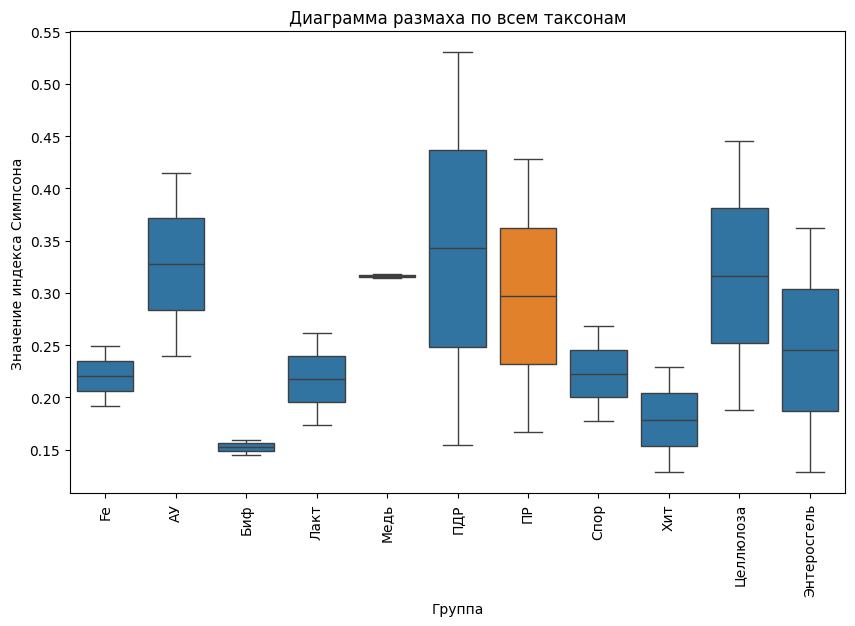

По семействам


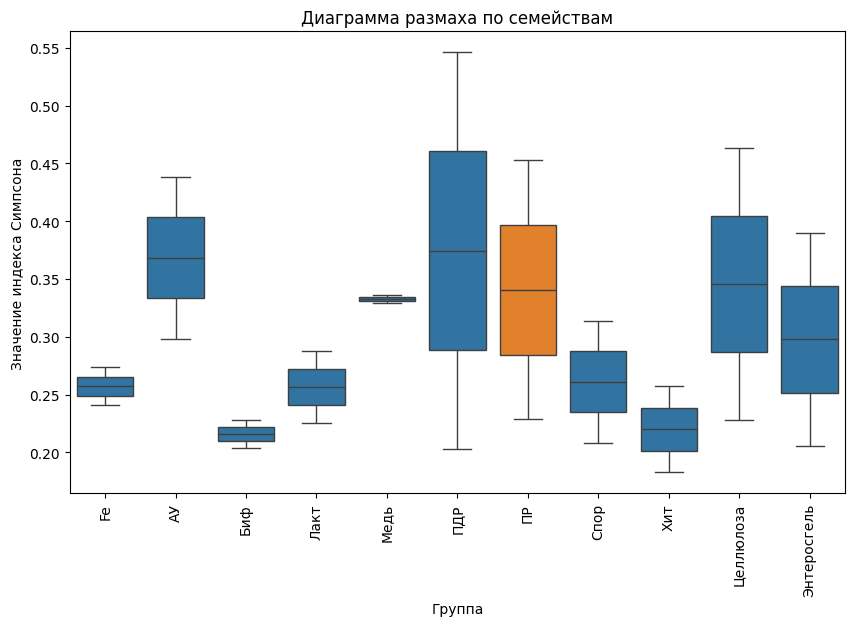

По порядкам


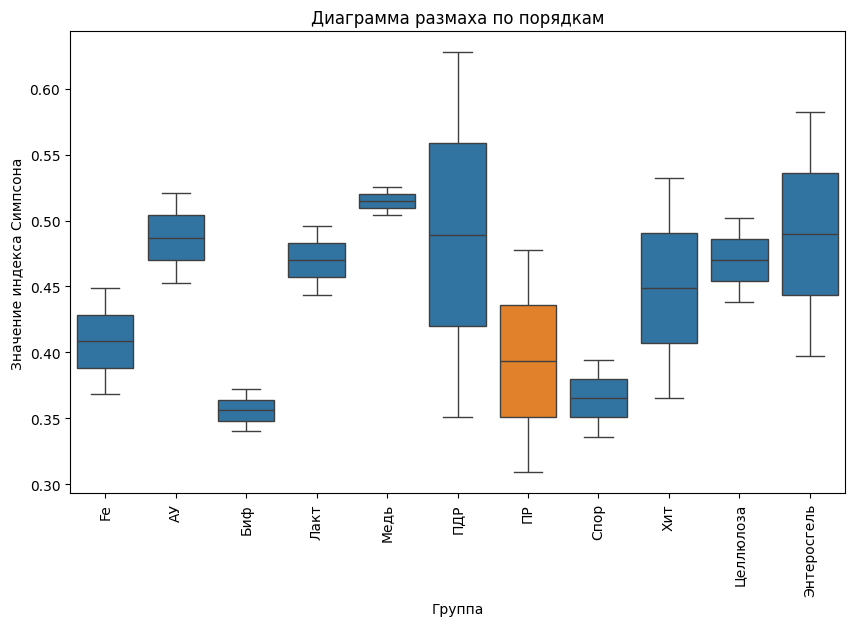

По классам


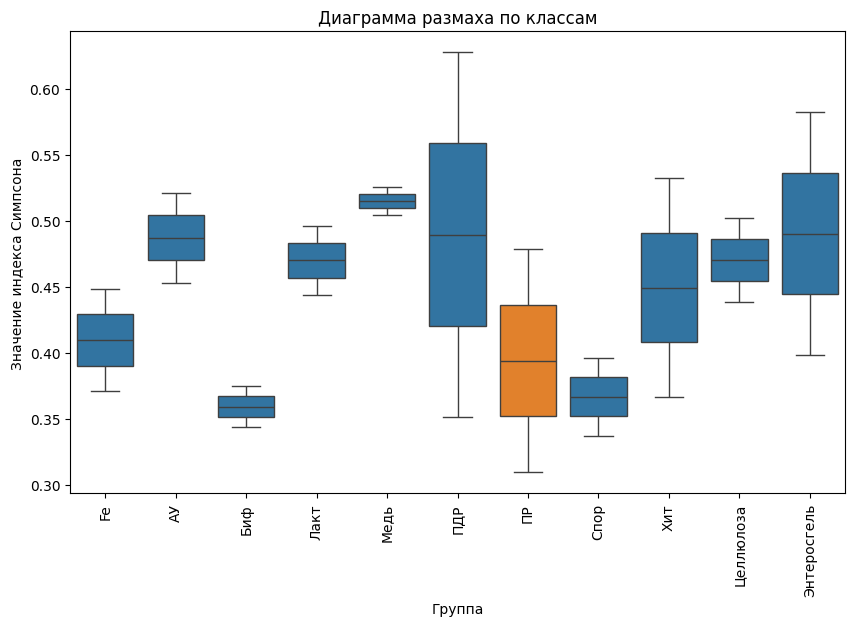

По филумам


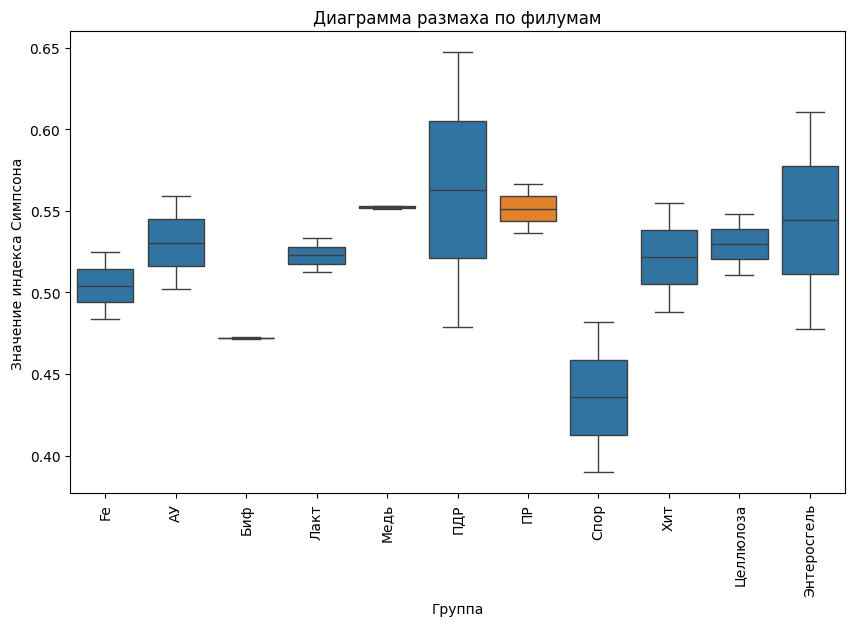

In [22]:
def simpson_diversity_test():
    for test_iter in DF_BY_GROUPS:
        print(test_iter['title'])
        df_iter = test_iter['df'].copy()
        df_iter['simpson_diversity'] = df_iter.apply(simpson_diversity, axis=1)
        group_counts = df_iter.reset_index()[['group', 'simpson_diversity']]
        group_counts = group_counts.sort_values(by=['group'])

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_xlabel('Группа')
        ax.set_ylabel('Значение индекса Симпсона')
        colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
        ax.tick_params(axis='x', labelrotation=90)
        sns.boxplot(data=group_counts, x='group', y='simpson_diversity', ax=ax, palette=colors)
        plt.title(f"Диаграмма размаха {test_iter['title'].lower()}")
        plt.show()

simpson_diversity_test()

### 1.3 Индекс Чао

In [ ]:
def chao_diversity(fracs: list):
    return 0

## 2 Бета-разнообразие

$\beta$-разнообразие измеряет расстояние между двумя или более отдельными объектами. Таким образом, оно описывает разницу между двумя сообществами или экосистемами.

Для расчёта $\beta$-разнообразия используются несколько индексов, поскольку разные индексы подчёркивают различные аспекты композиционного сходства или различия между сообществами или участками.

Эти индексы были разработаны для решения конкретных исследовательских задач, работы с различными типами данных или для получения информации о различных аспектах $\beta$-разнообразия.

In [44]:
def make_beta_heatmap(df: pd.DataFrame, calc_func):
    size = len(df)
    matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(i, size):
            matrix[i,j] = matrix[j,i] = calc_func(df.iloc[i,:], df.iloc[j,:])
    return matrix

In [36]:
c = np.array([[1,2],[3,4]])

### 2.1 Индекс Жаккара

Индекс Жаккара, который измеряет долю общих видов в двух выборках

$$ J(X, Y) = \frac{||X \cap Y||}{||X \cup Y||}$$

- $X \cap Y$ - пересечение множеств X и Y (элементы, общие для обоих множеств)
- $X \cup Y$ - объединение множеств X и Y (все уникальные элементы из обоих множеств вместе)

In [32]:
def  jacquard_index(fraq1: np.array, fraq2: np.array):
    c = np.array([fraq1, fraq2])
    maxs = c.max(axis=0)
    mins = c.min(axis=0)
    return sum(mins) / sum(maxs)

По всем таксонам


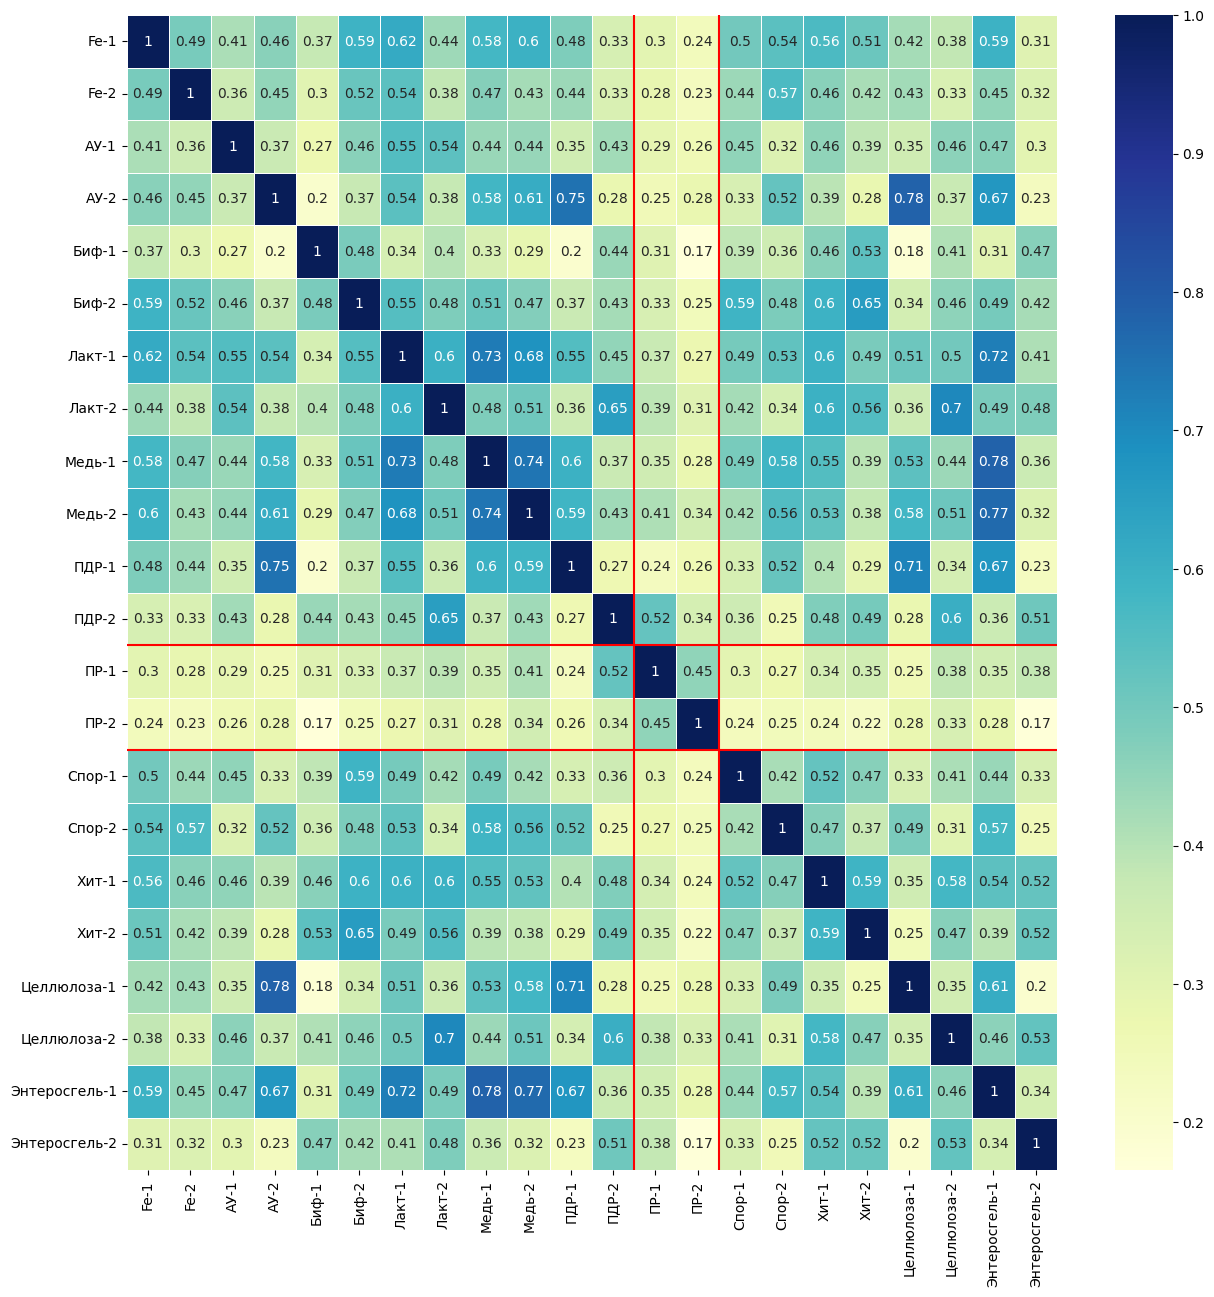

По семействам


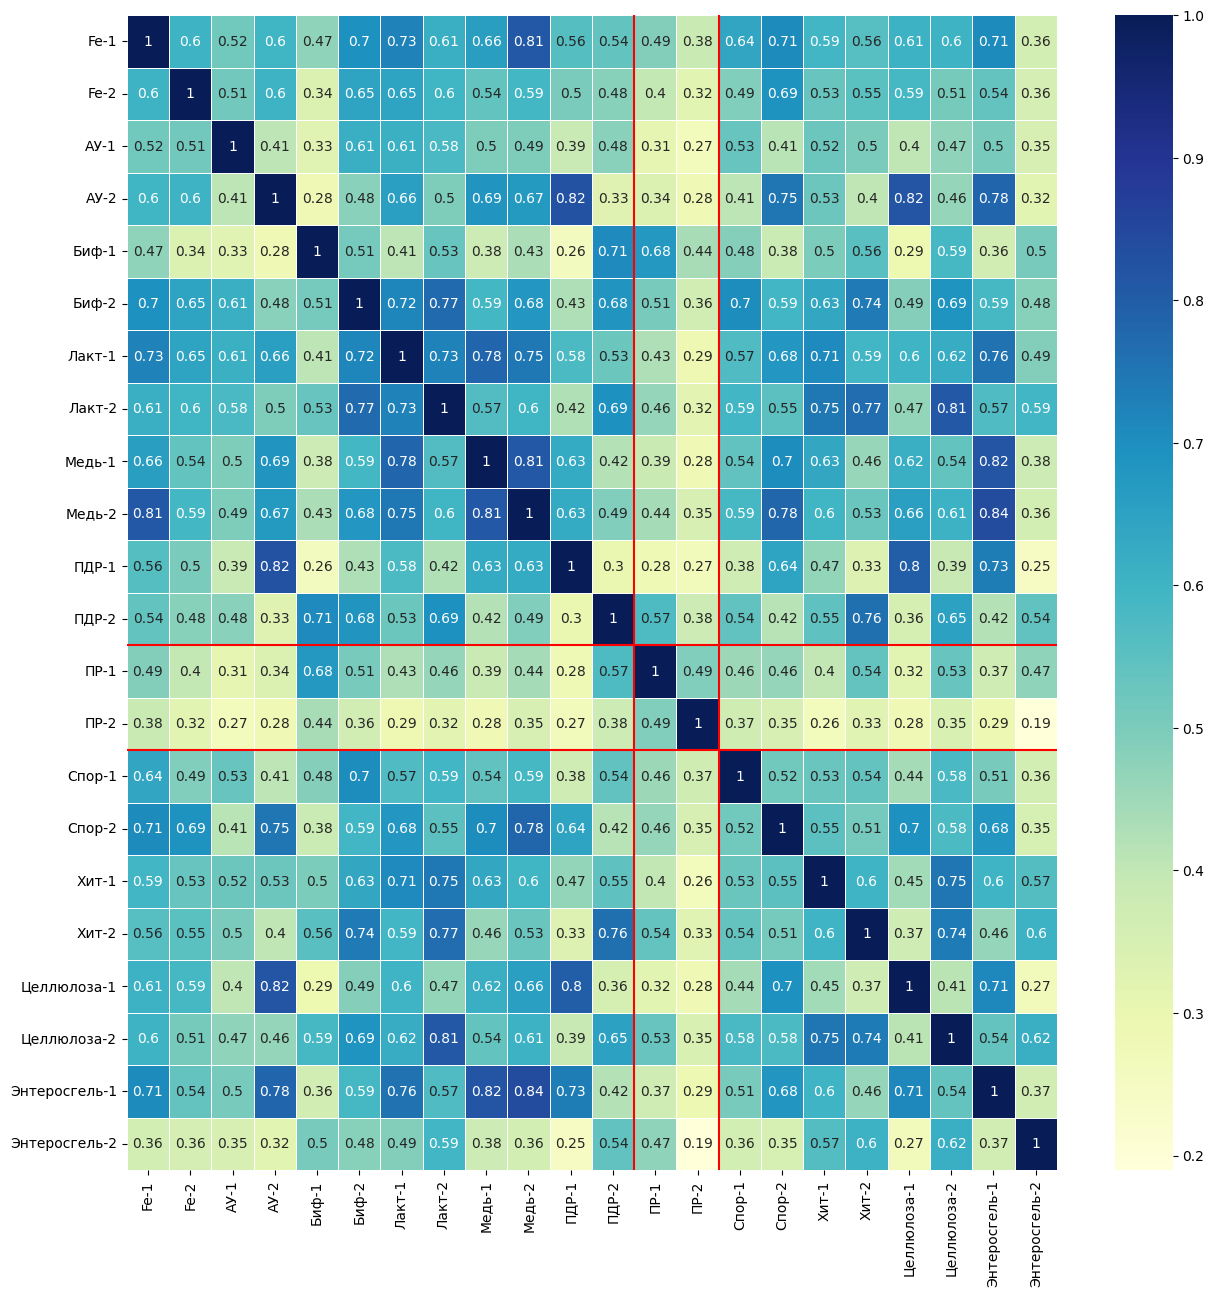

По порядкам


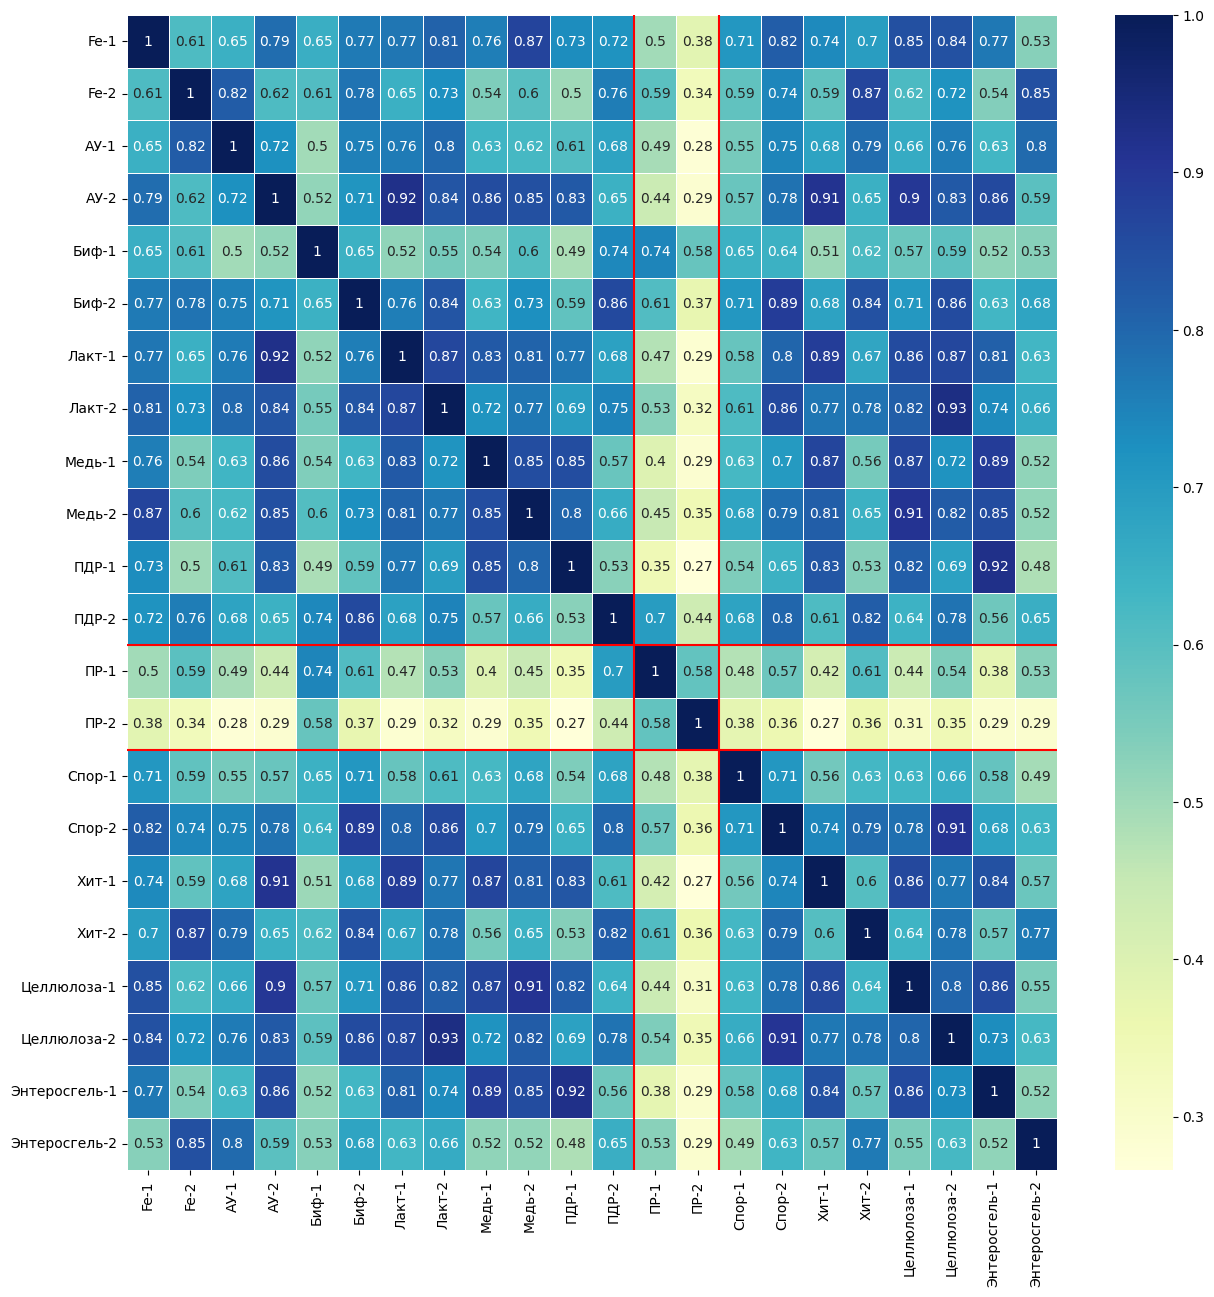

По классам


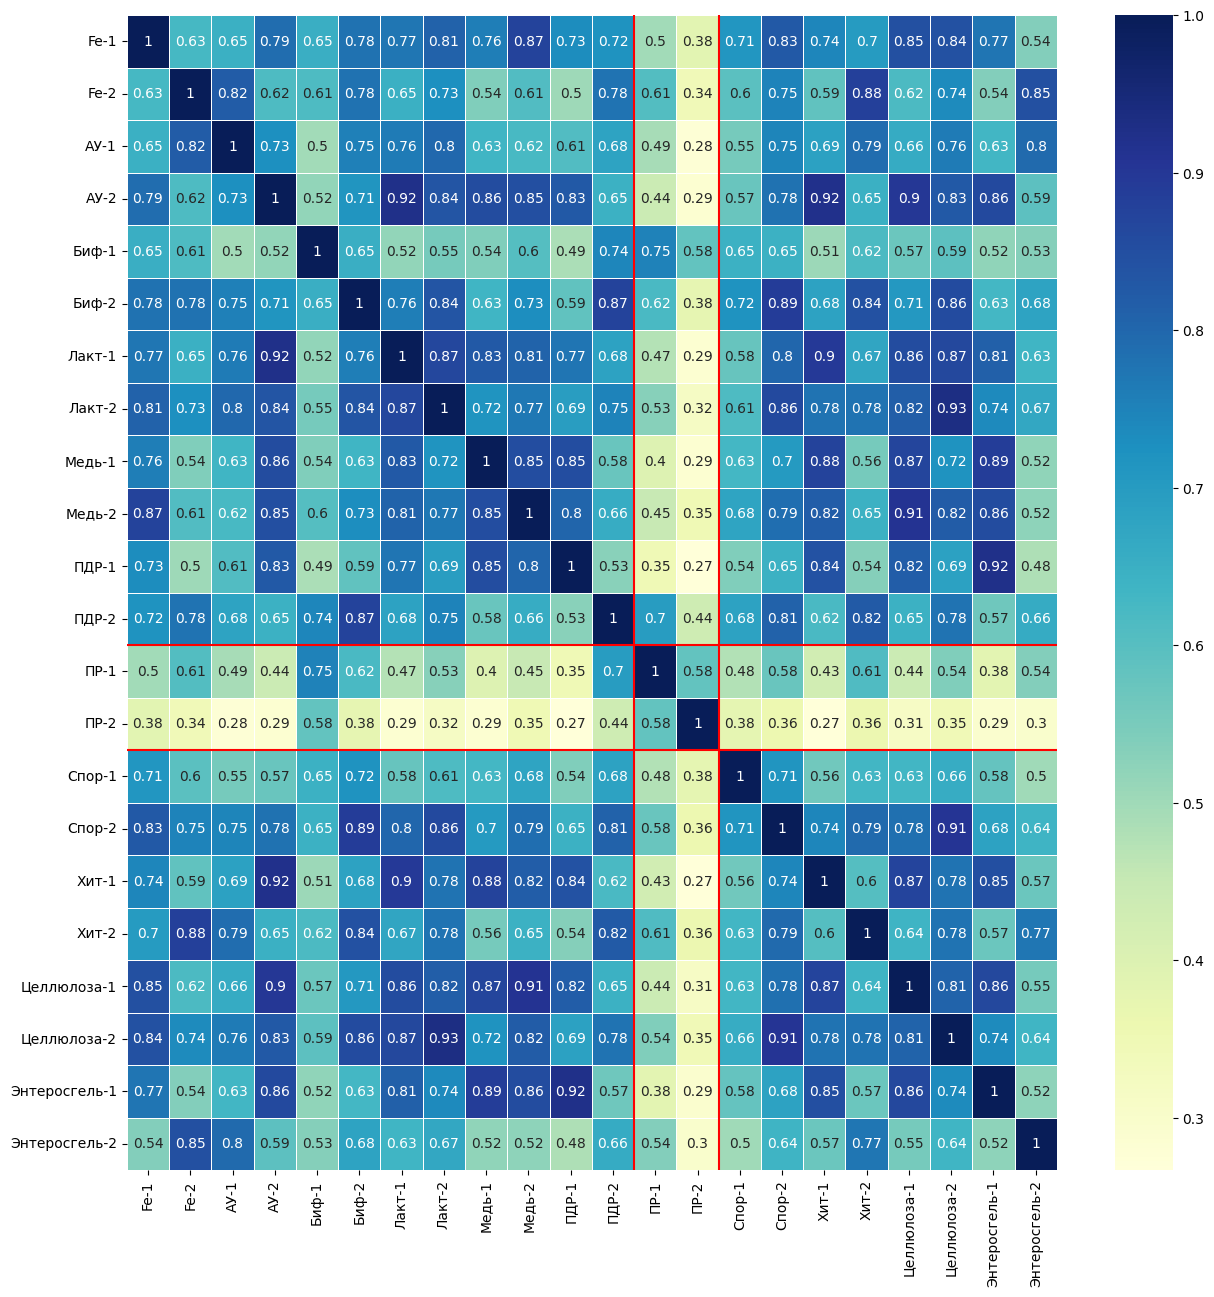

По филумам


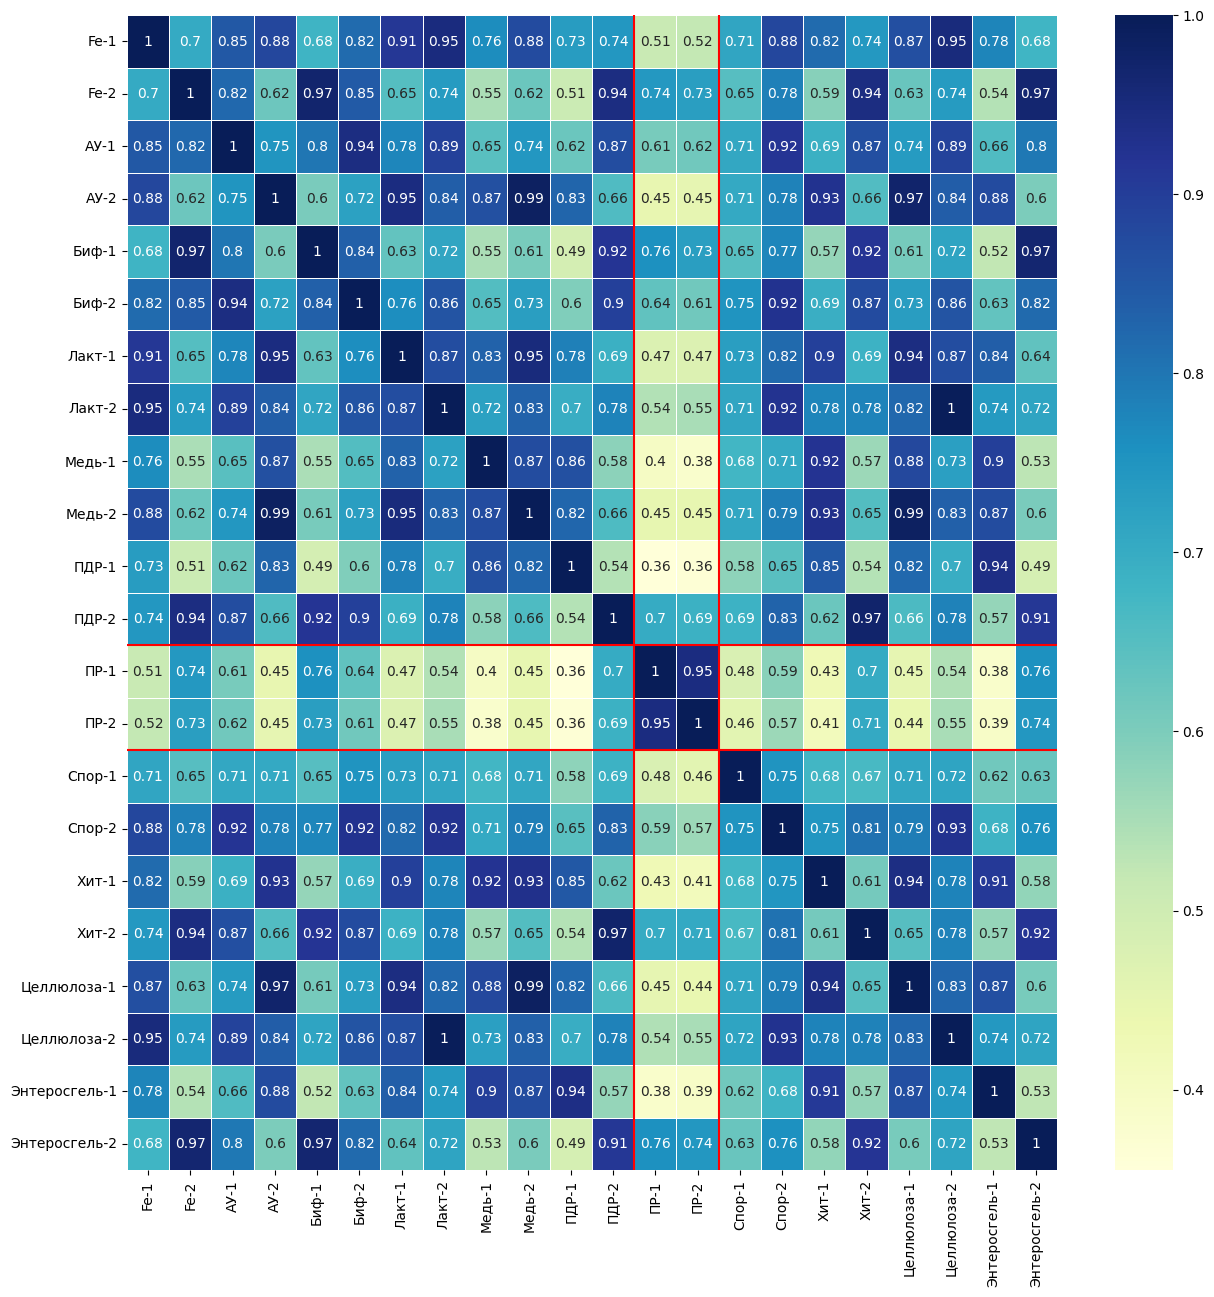

In [83]:
def test_jacquard():
    for test_iter in DF_BY_GROUPS:
        test_iter_title = test_iter['title']
        test_iter_df = test_iter['df']
        print(test_iter_title)

        x_labels = [f'{x[0]}-{str(x[1])}' for x in test_iter_df.index]
        y_labels = x_labels

        hm = make_beta_heatmap(test_iter_df, jacquard_index)
        fig, ax = plt.subplots(figsize=(15, 15))
        axes = sns.heatmap(data=hm, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
        axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
        axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)

        index_target = [x[0] for x in test_iter_df.index].index(GROUP_CLEAN)
        if index_target != -1:
            axes.axvline(x=index_target, linewidth=1.5, color="red")
            axes.axvline(x=index_target+2, linewidth=1.5, color="red")

        if index_target != -1:
            axes.axhline(y=index_target, linewidth=1.5, color="red")
            axes.axhline(y=index_target+2, linewidth=1.5, color="red")    
        
        plt.title("")
        plt.show()

test_jacquard()

Усредняем по группам и проводим тот же анализ

По всем таксонам


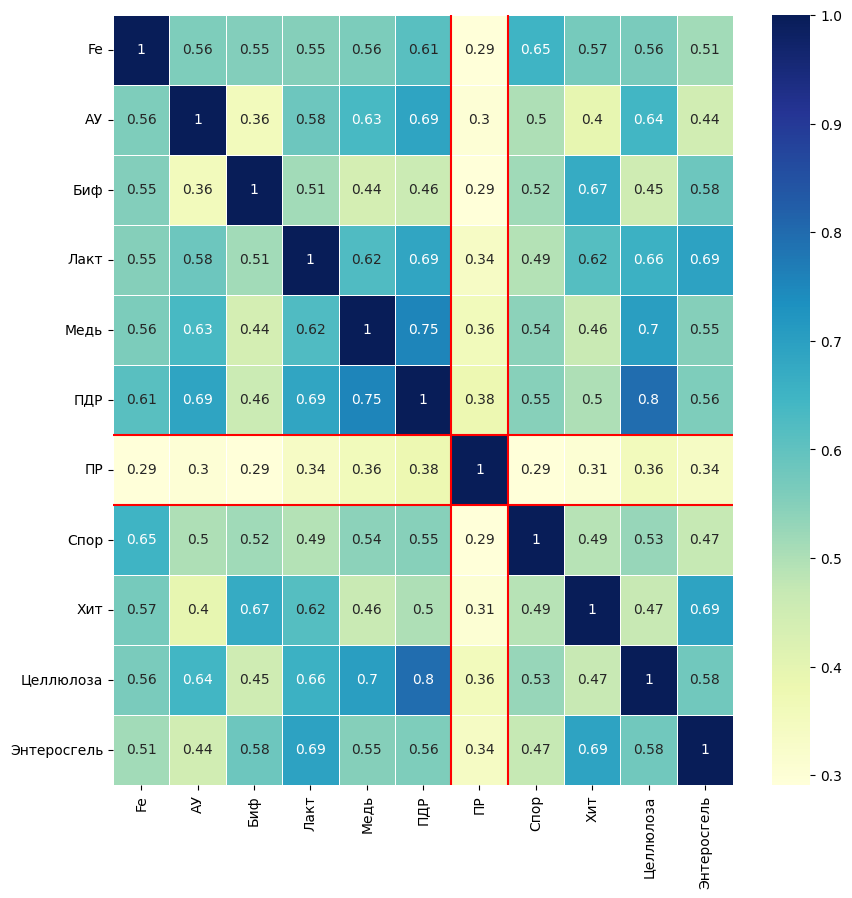

По семействам


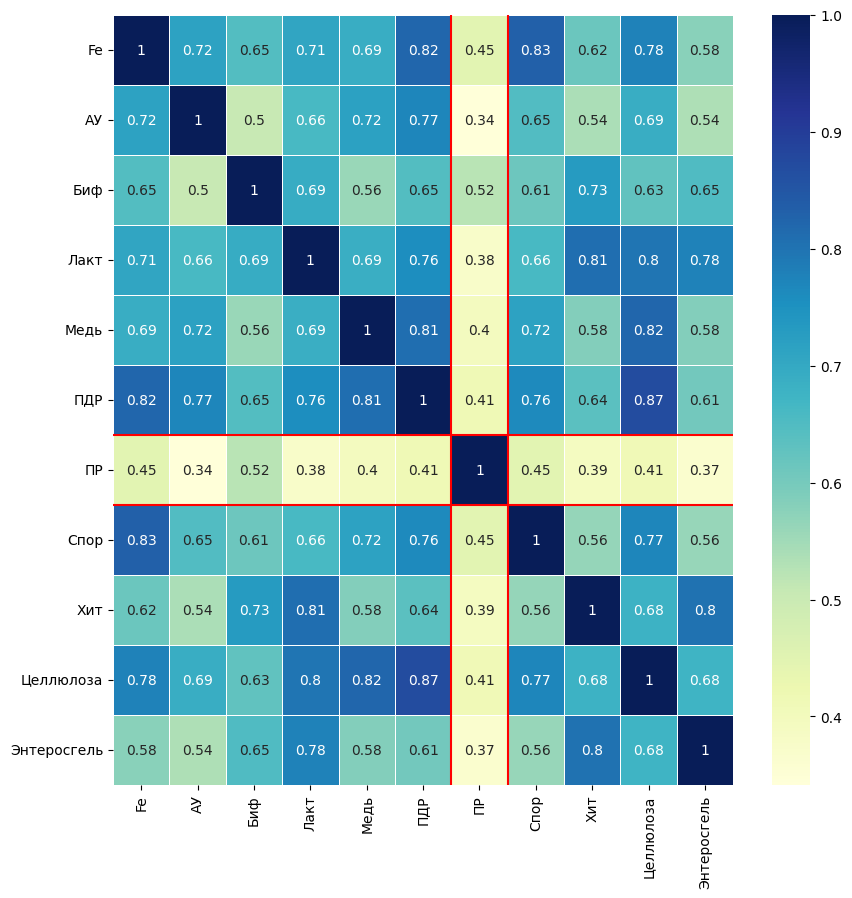

По порядкам


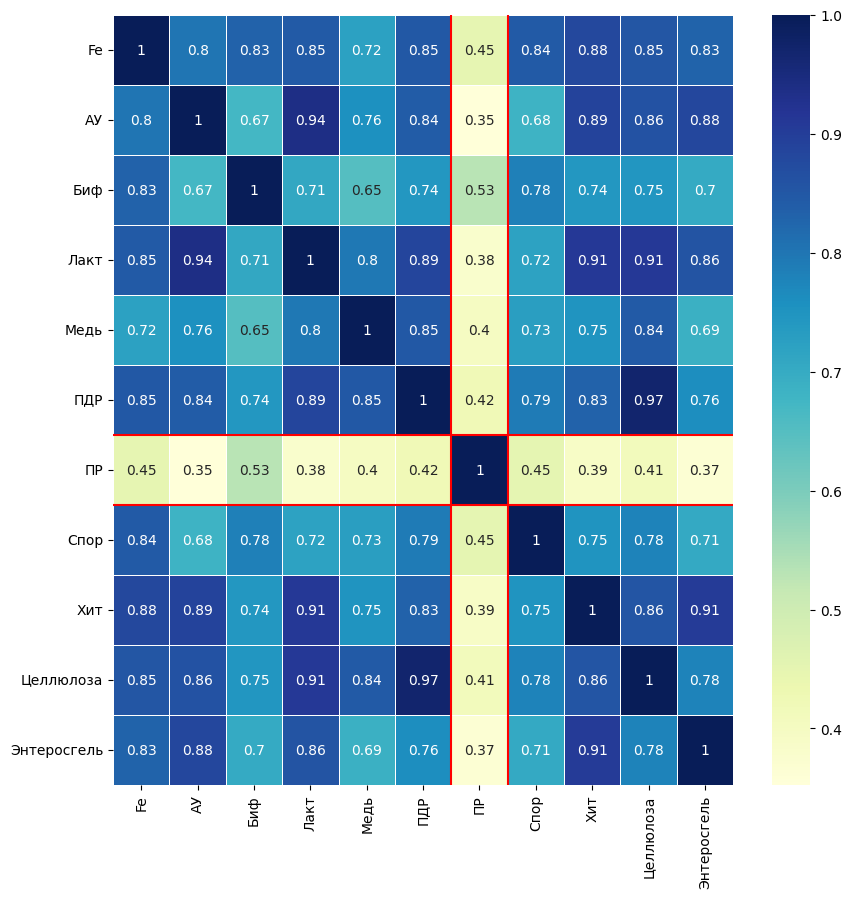

По классам


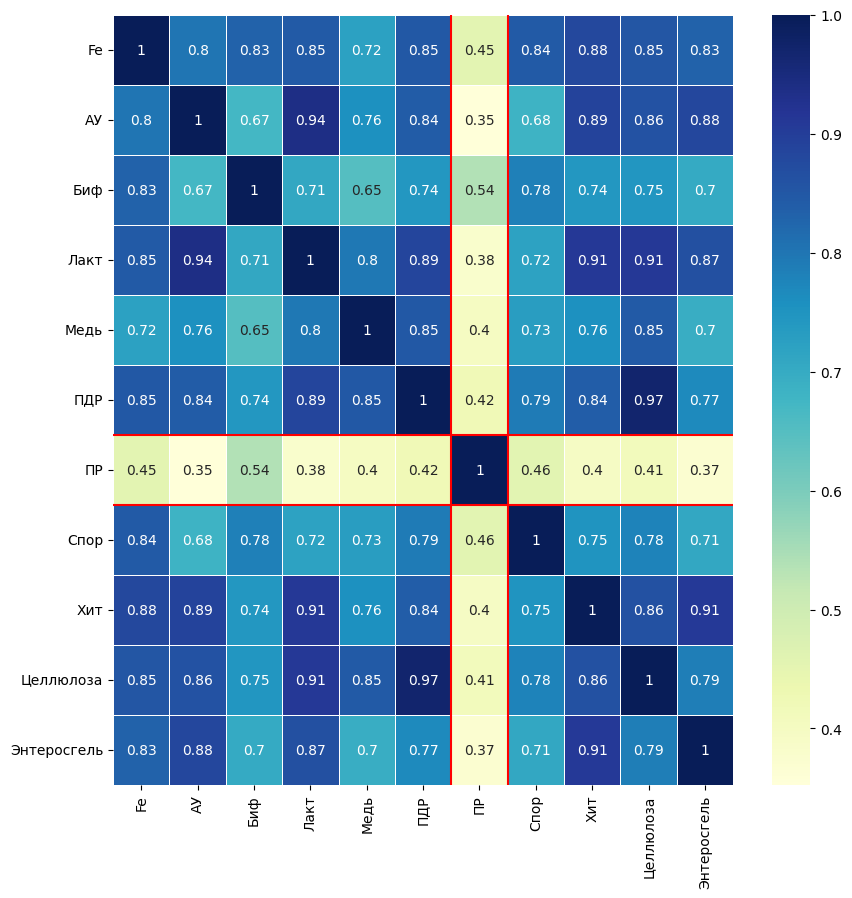

По филумам


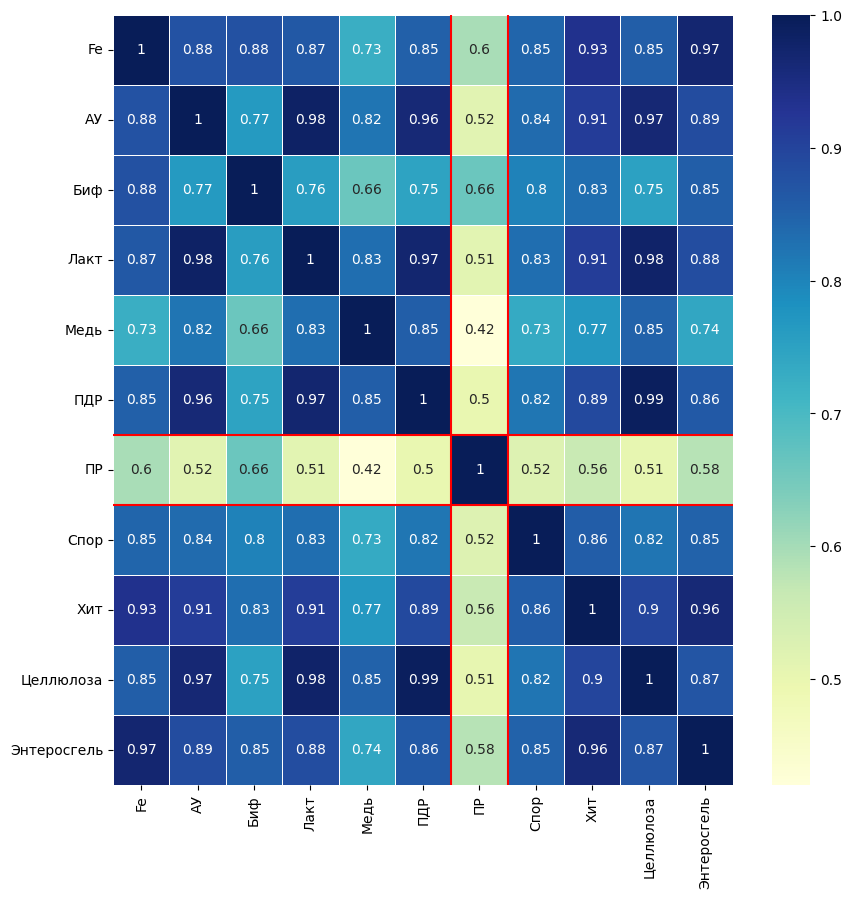

In [90]:
def test_jacquard_avg():
    for test_iter in DF_AVG_BY_GROUPS:
        test_iter_title = test_iter['title']
        test_iter_df = test_iter['df']
        print(test_iter_title)

        x_labels = [f'{x}' for x in test_iter_df.index]
        y_labels = x_labels

        hm = make_beta_heatmap(test_iter_df, jacquard_index)
        fig, ax = plt.subplots(figsize=(10, 10))
        axes = sns.heatmap(data=hm, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
        axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
        axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
        
        index_target = [x for x in test_iter_df.index].index(GROUP_CLEAN)
        if index_target != -1:
            axes.axvline(x=index_target, linewidth=1.5, color="red")
            axes.axvline(x=index_target+1, linewidth=1.5, color="red")

        if index_target != -1:
            axes.axhline(y=index_target, linewidth=1.5, color="red")
            axes.axhline(y=index_target+1, linewidth=1.5, color="red")    
        
        plt.title("")
        plt.show()

test_jacquard_avg()

По усреднению по относительным частям

По всем таксонам


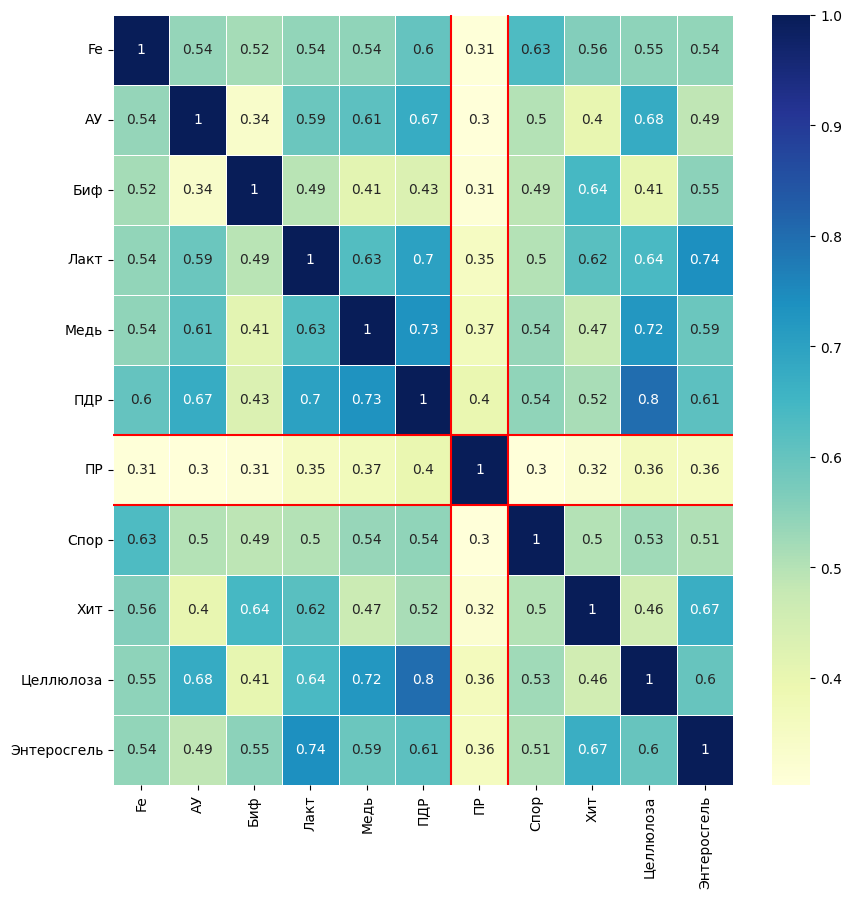

По семействам


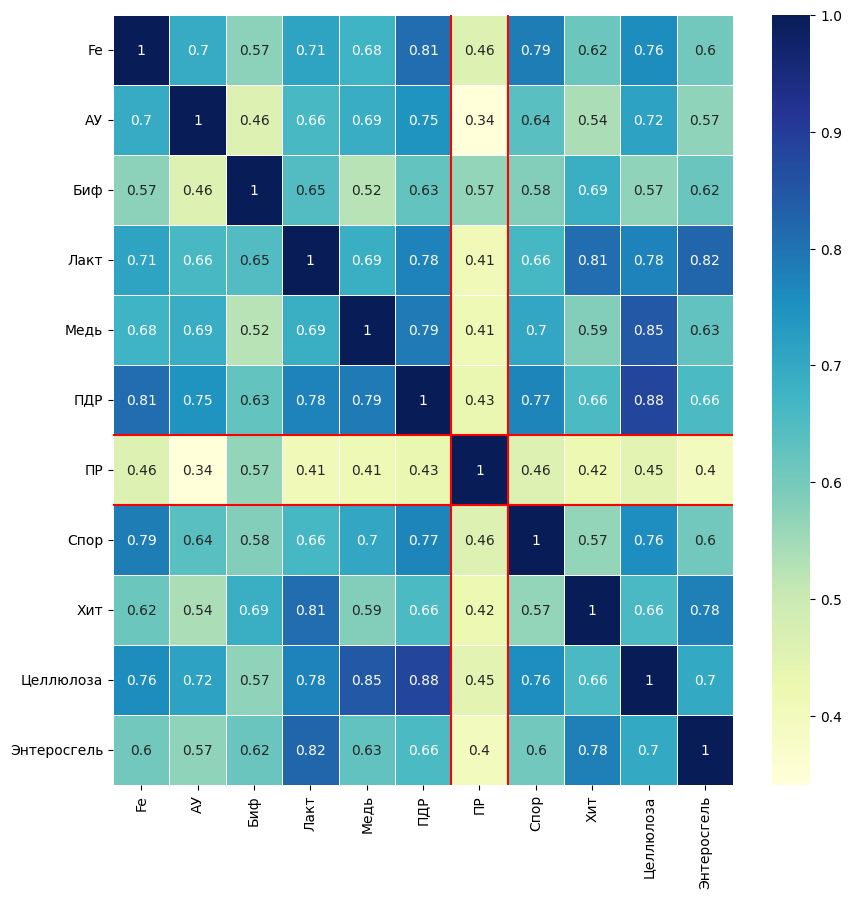

По порядкам


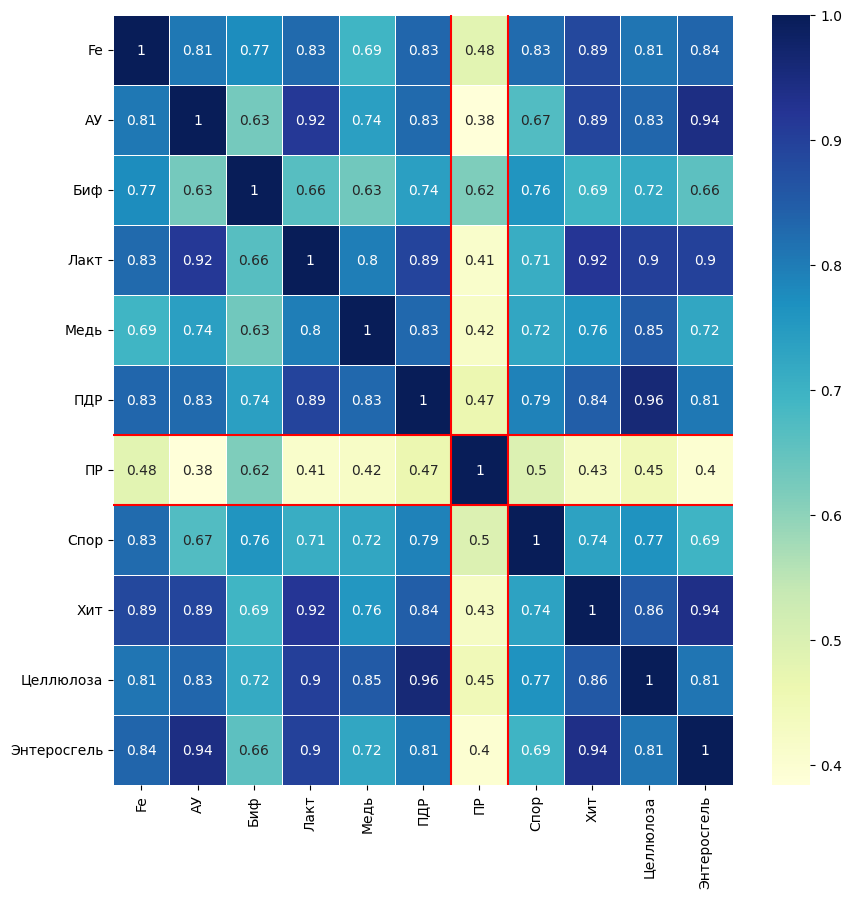

По классам


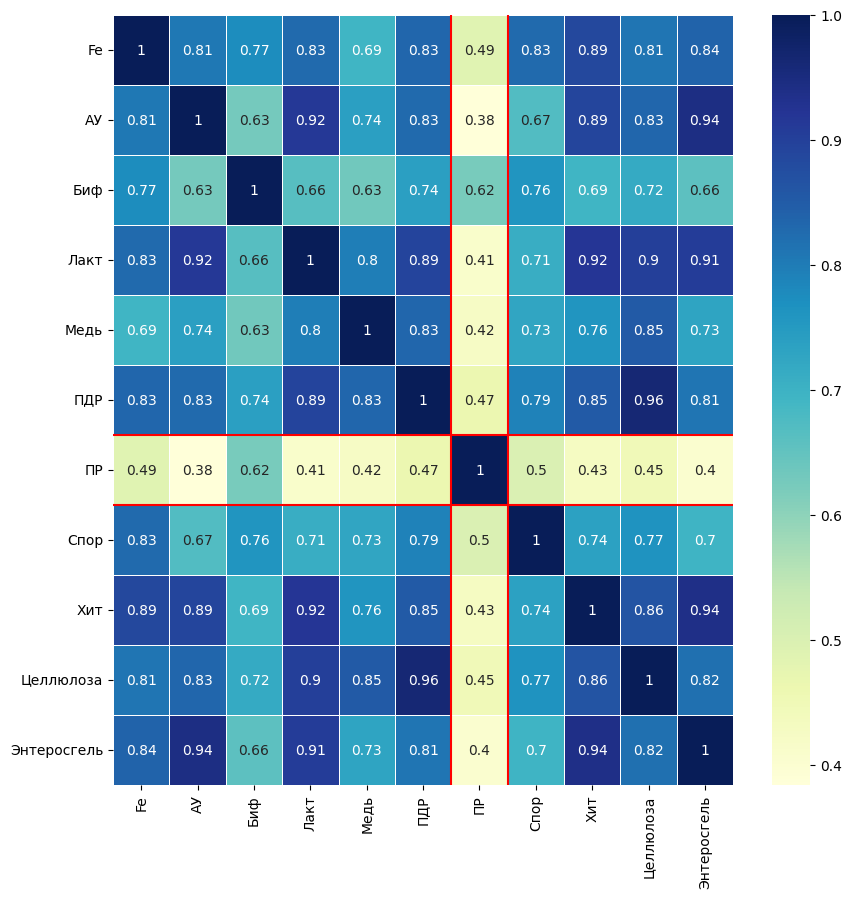

По филумам


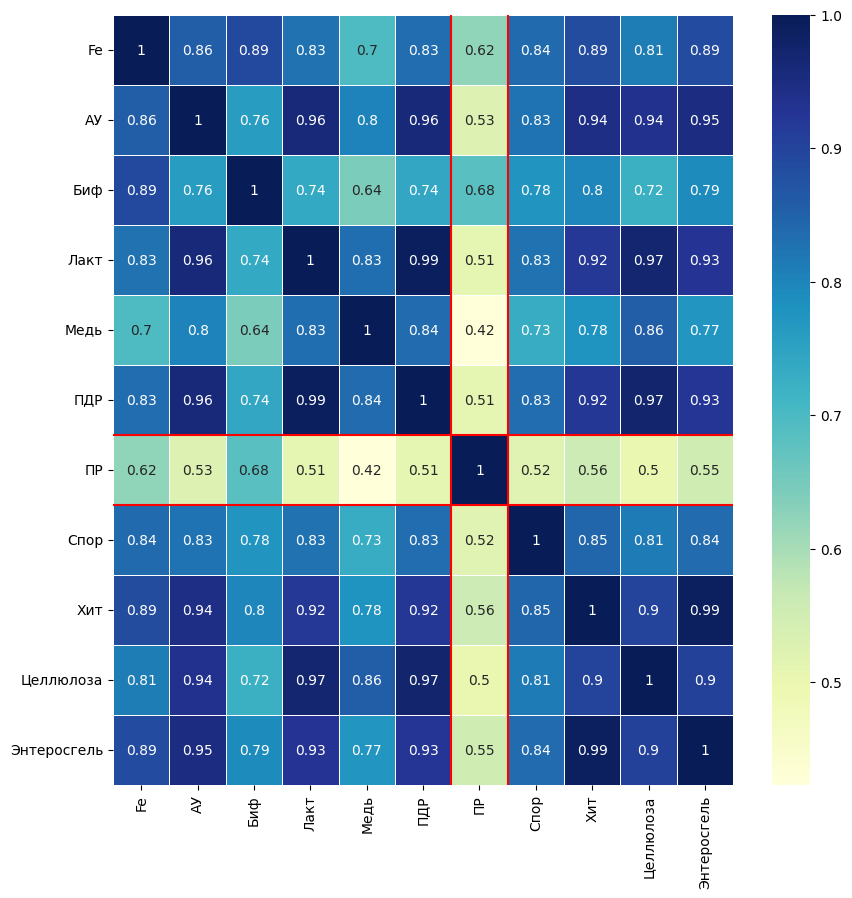

In [91]:
def test_jacquard_avg_frac():
    for test_iter in DF_AVG_FRAC_BY_GROUPS:
        test_iter_title = test_iter['title']
        test_iter_df = test_iter['df']
        print(test_iter_title)

        x_labels = [f'{x}' for x in test_iter_df.index]
        y_labels = x_labels

        hm = make_beta_heatmap(test_iter_df, jacquard_index)
        fig, ax = plt.subplots(figsize=(10, 10))
        axes = sns.heatmap(data=hm, ax=ax, cmap='YlGnBu', annot=True, linewidth=.5)
        axes.set_yticklabels(y_labels, rotation = 0, fontsize = 10)
        axes.set_xticklabels(x_labels, rotation = 90, fontsize = 10)
        
        index_target = [x for x in test_iter_df.index].index(GROUP_CLEAN)
        if index_target != -1:
            axes.axvline(x=index_target, linewidth=1.5, color="red")
            axes.axvline(x=index_target+1, linewidth=1.5, color="red")

        if index_target != -1:
            axes.axhline(y=index_target, linewidth=1.5, color="red")
            axes.axhline(y=index_target+1, linewidth=1.5, color="red")    
        
        plt.title("")
        plt.show()

test_jacquard_avg_frac()

## Ресурсы:

- [Пример](https://7universum.com/ru/med/archive/item/13192)
- [Пример 2](https://training.galaxyproject.org/training-material/topics/microbiome/tutorials/diversity/tutorial.html)
- [Статья с анализом](https://vavilovj-icg.ru/download/12_Druzhinin.pdf)
- [Тут пример анализа с исследованием](https://agrobiology.ru/articles/4-2020il'ina-rus.pdf)